## CS4055 Project
# Cathal Daly, James Shally, Patrick O' Hora

- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall:The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- SunshineThe number of hours of bright sunshine in the day.
- RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrowThe target variable. Did it rain tomorrow?

## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./weatherAUS.csv')

In [4]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,06/12/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,07/12/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,08/12/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,09/12/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,10/12/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


- First 10 rows of the Dataset

In [5]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,15/06/2017,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,16/06/2017,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,17/06/2017,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,18/06/2017,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,19/06/2017,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,20/06/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


- Last 10 rows of the Dataset
This dataset is very large with 142,192 rows of data with both numerical and categorical attributes.

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


There are a few inferences we can draw by looking at the output of `describe()`:

- 'Rainfall' has 1407 missing values 
- 'MinTemp' has 638 missing values
- 'MaxTemp' has 323 missing values
- 'Sunshine' has 67,815 missing values
- 'Evaporation' has 60,842 missing values

In [7]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [8]:
df['RainTomorrow'].count()

142193

There are no missing values for RainTomorrow attribute

## C. Distribution Analysis for Numerical Atributes

Text(0, 0.5, 'Number of Days')

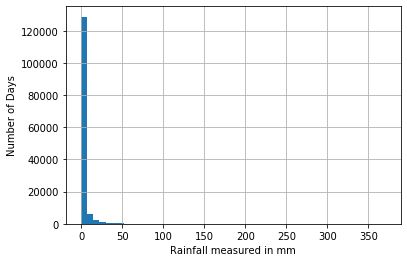

In [9]:
df['Rainfall'].hist(bins=50)
plt.xlabel('Rainfall measured in mm')
plt.ylabel('Number of Days')

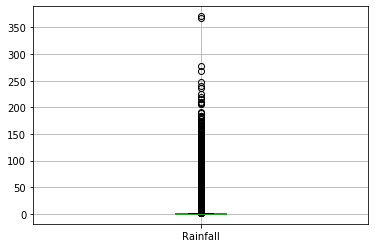

In [10]:
df.boxplot(column='Rainfall')

The Boxplot above confirms the presence of a lot of outliers/extreme values.

Text(0.5, 0.98, '')

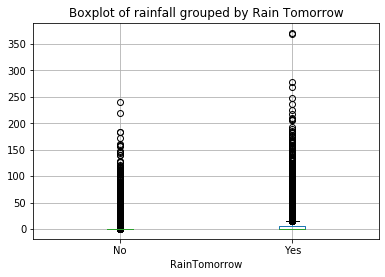

In [11]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='Rainfall', by='RainTomorrow')
plt.title('Boxplot of rainfall grouped by Rain Tomorrow')
plt.suptitle("")

Text(0, 0.5, 'Number of Days')

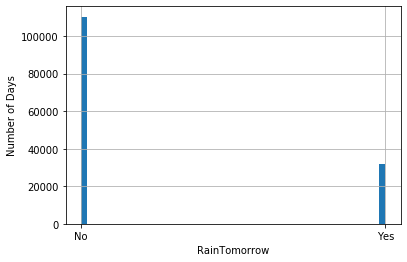

In [12]:
df['RainTomorrow'].hist(bins=50)
plt.xlabel('RainTomorrow')
plt.ylabel('Number of Days')

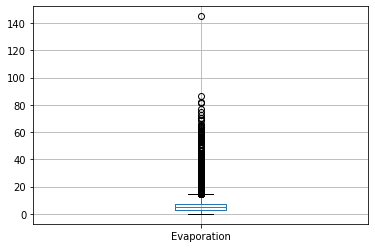

In [13]:
df.boxplot(column='Evaporation')

There are extreme values in both MaxTemp and Evaporation. The datasets will require some data munging. Both MaxTemp and Evaporation have msiing values. Further in the project these missing values will have to be predicted. 

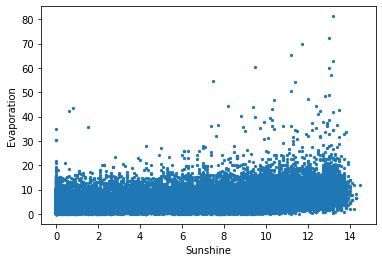

In [30]:
sizes = 5
df.plot.scatter(x='Sunshine', y='Evaporation', s=sizes)

Based on this scatter plot we can say that evaporation probably tends to grow as sunshine grows. 

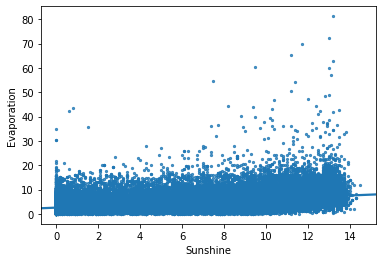

In [40]:
import seaborn as sns
sns.regplot(x='Sunshine', y='Evaporation', data=df, scatter_kws={'s':5})

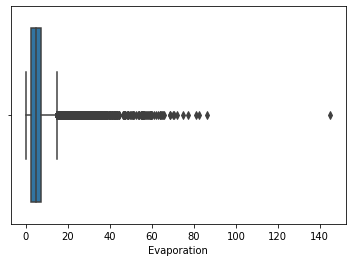

In [16]:
sns.boxplot(x=df['Evaporation'])

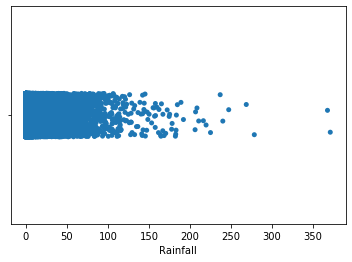

In [44]:
sns.stripplot(x=df['Rainfall'], jitter=True)

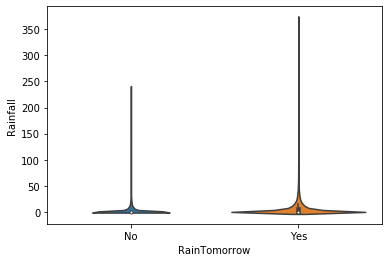

In [45]:
sns.violinplot(x='RainTomorrow', y='Rainfall', data=df)

## Distribution Analysis for Categorical Attributes
RainTomorrow is rather a categorical attribute with two categories
- Yes - It will be raining tomorrow 
- No - It will not be raining tomorrow

In [19]:
frequency_table = df['RainTomorrow'].value_counts(ascending=True)
print('Frequency Table for Rain tomorrow:') 
print(frequency_table)

Frequency Table for Rain tomorrow:
Yes     31877
No     110316
Name: RainTomorrow, dtype: int64


- There is no missing data in the RainTomorrow column

Text(0.5, 1.0, 'RainTomorrow by Number of Days')

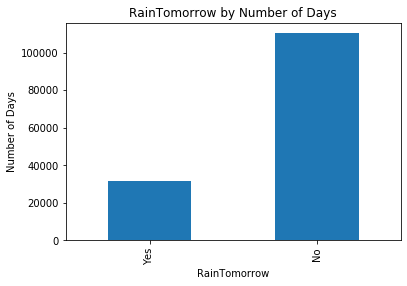

In [20]:
frequency_table.plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Number of Days')
plt.title('RainTomorrow by Number of Days')

Graphed above in the barchart is RainTomorrow with the number of days

Text(0, 0.5, 'Number of Days')

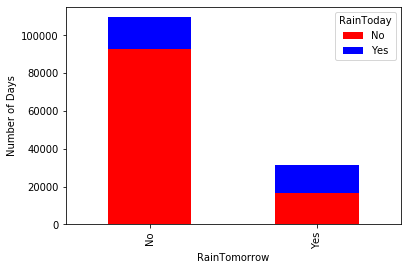

In [21]:
stacked_chart = pd.crosstab(df['RainTomorrow'], df['RainToday'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Days')

This is a stackchart of RainTomorrow in red and RainToday in blue graphed in the number of days in the dataset. 